## Explorating missing values.
Setting up our environment.

#### Import libraries

In [1]:
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import session_info
import upsetplot
import janitor

### Set up a general overview for projects' plots.

In [2]:
%matplotlib inline

sns.set(
    rc={
        "figure.figsize": (10, 10)
    }
)

sns.set_style("whitegrid")

##### Python

In [3]:
print(
    None or True,
    None or False,
    None == None,
    None is None,
    type(None),
    sep='\n'
)

True
False
True
True
<class 'NoneType'>


##### NumPy

In [4]:
print(
    np.nan or True,
    np.nan or False,
    type(np.nan),
    np.nan == np.nan, #we are talking about float datatypes, we cannot compare 'em because both are instances of class 'Float'
    np.nan is np.nan,
    np.isnan(np.nan),
    sep='\n'
)

nan
nan
<class 'float'>
False
True
True


##### Pandas

In [5]:
test_missing_df = pd.DataFrame.from_dict(
    data=dict(
        x=[0, 1, np.nan, np.nan, None],
        y=[0, 1, pd.NA, np.nan, None]
    )
)

test_missing_df

,x,y
0,0.0,0
1,1.0,1
2,NaN,<NA>
3,NaN,NaN
4,NaN,None


In [6]:
(
    test_missing_df
    .isnull()
    # .isna()
)

,x,y
0,False,False
1,False,False
2,True,True
3,True,True
4,True,True


## Loading Datasets
### Pima Indians Diabetes

In [7]:
import pathlib

In [8]:
current_dir = pathlib.Path('.').absolute()
data_dir = current_dir.joinpath('../data/raw/pima-indians-diabetes.csv')

In [9]:
pima_indians_diabetes_url = "https://nrvis.com/data/mldata/pima-indians-diabetes.csv"

In [10]:
if not data_dir.exists():
    !wget -P './../data/raw/pima-indians-diabetes.csv' { pima_indians_diabetes_url } -q

In [11]:
diabetes_df = pd.read_csv(
    './../data/raw/pima-indians-diabetes.csv',
    sep=',',
    names=[
        "pregnancies",
        "glucose",
        "blood_pressure",
        "skin_thickness",
        "insulin",
        "bmi",
        "diabetes_pedigree_function",
        "age",
        "outcome",
    ]
    )
diabetes_df

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### naniar (oceanbuoys, pedestrian, riskfactors)
#### Creating info units from datasets.

In [12]:
base_url = "https://github.com/njtierney/naniar/raw/master/data/"
datasets_names = ("oceanbuoys", "pedestrian", "riskfactors")
extension = ".rda"

In [13]:
datasets_dfs = {}

for dataset_name in datasets_names:

    dataset_file = f"{ dataset_name }{ extension }"
    dataset_output_file = f"./../data/raw/{ dataset_file }"
    dataset_url = f"{ base_url }{ dataset_file }"

    !wget -q -O { dataset_output_file } { dataset_url }
    datasets_dfs[f"{ dataset_name }_df"] = pyreadr.read_r(dataset_output_file).get(dataset_name)

datasets_dfs.keys()

dict_keys(['oceanbuoys_df', 'pedestrian_df', 'riskfactors_df'])

#### Including datasets in our virtual environment.

In [14]:
locals().update(**datasets_dfs)
del datasets_dfs

In [15]:
oceanbuoys_df.shape, pedestrian_df.shape, riskfactors_df.shape, diabetes_df.shape

((736, 8), (37700, 9), (245, 34), (768, 9))

In [112]:
%run pandas-missing-extension.ipynb

## Tabulating missing values

In [104]:
riskfactors_df.isna()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
241,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
242,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


### Brief resume of missing values

In [105]:
riskfactors_df.size

8330

In [106]:
riskfactors_df.shape

(245, 34)

#### Total complete values

In [107]:
riskfactors_df.missing.number_complete()

7144

#### Total missing values

In [113]:
riskfactors_df.missing.number_missing()

1186

## Tabular review of missing values
### Variables / columns
#### Resume per variable

In [114]:
riskfactors_df.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,state,0,245,0.000000
1,sex,0,245,0.000000
2,age,0,245,0.000000
3,weight_lbs,10,245,4.081633
4,height_inch,2,245,0.816327
5,bmi,11,245,4.489796
6,marital,1,245,0.408163
7,pregnant,215,245,87.755102
8,children,0,245,0.000000
9,education,1,245,0.408163


#### Tabulation of the resume per variable

In [117]:
riskfactors_df.missing.missing_case_table()

KeyError: "['percent_missing'] not in index"

#### Cases / Observations / Rows
##### Resume per case

In [76]:
riskfactors_df.missing.missing_case_summary()

KeyError: "['percent_missing'] not in index"

In [77]:
riskfactors_df.missing.missing_case_table()

KeyError: "['percent_missing'] not in index"

### Missing value intervals

In [78]:
(
    riskfactors_df
    .missing
    .missing_variable_span(
        variable='weight_lbs',
        span_every=50
    )
)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,1,49,2.000000,98.000000
1,1,5,45,10.000000,90.000000
2,2,1,49,2.000000,98.000000
3,3,1,49,2.000000,98.000000
4,4,2,43,4.444444,95.555556


### _Run length_ of missing values

In [82]:
(
    riskfactors_df
    .missing
    .missing_variable_run(
        variable='weight_lbs'
    )
)

,run_length,is_na
0,14,complete
1,1,missing
2,45,complete
3,1,missing
4,5,complete
5,1,missing
6,12,complete
7,1,missing
8,10,complete
9,2,missing


### Initial visualization of missing values
#### Variable

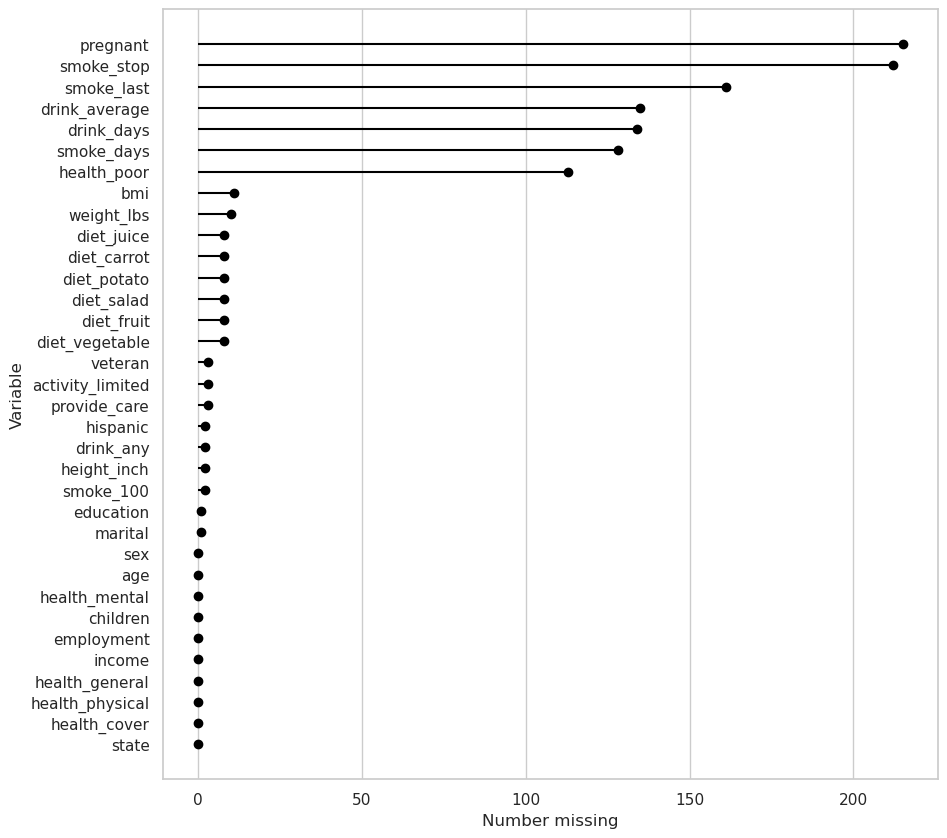

In [83]:
riskfactors_df.missing.missing_variable_plot()

#### Cases / Observations / Rows

In [102]:
riskfactors_df.missing.missing_case_plot()

KeyError: "['percent_missing'] not in index"

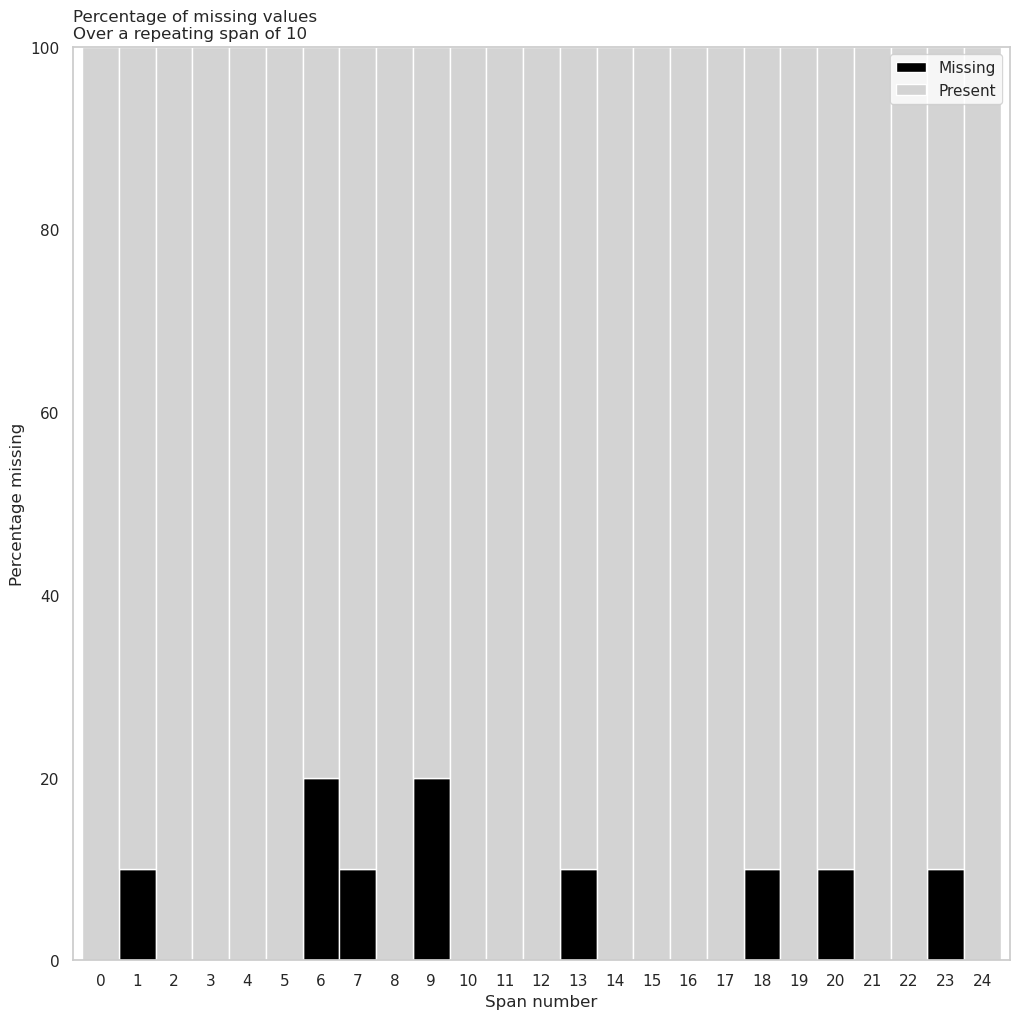

In [ ]:
(
    riskfactors_df
    .missing
    .missing_variable_span_plot(
        variable="weight_lbs",
        span_every=10,
        rot=0
    )
)

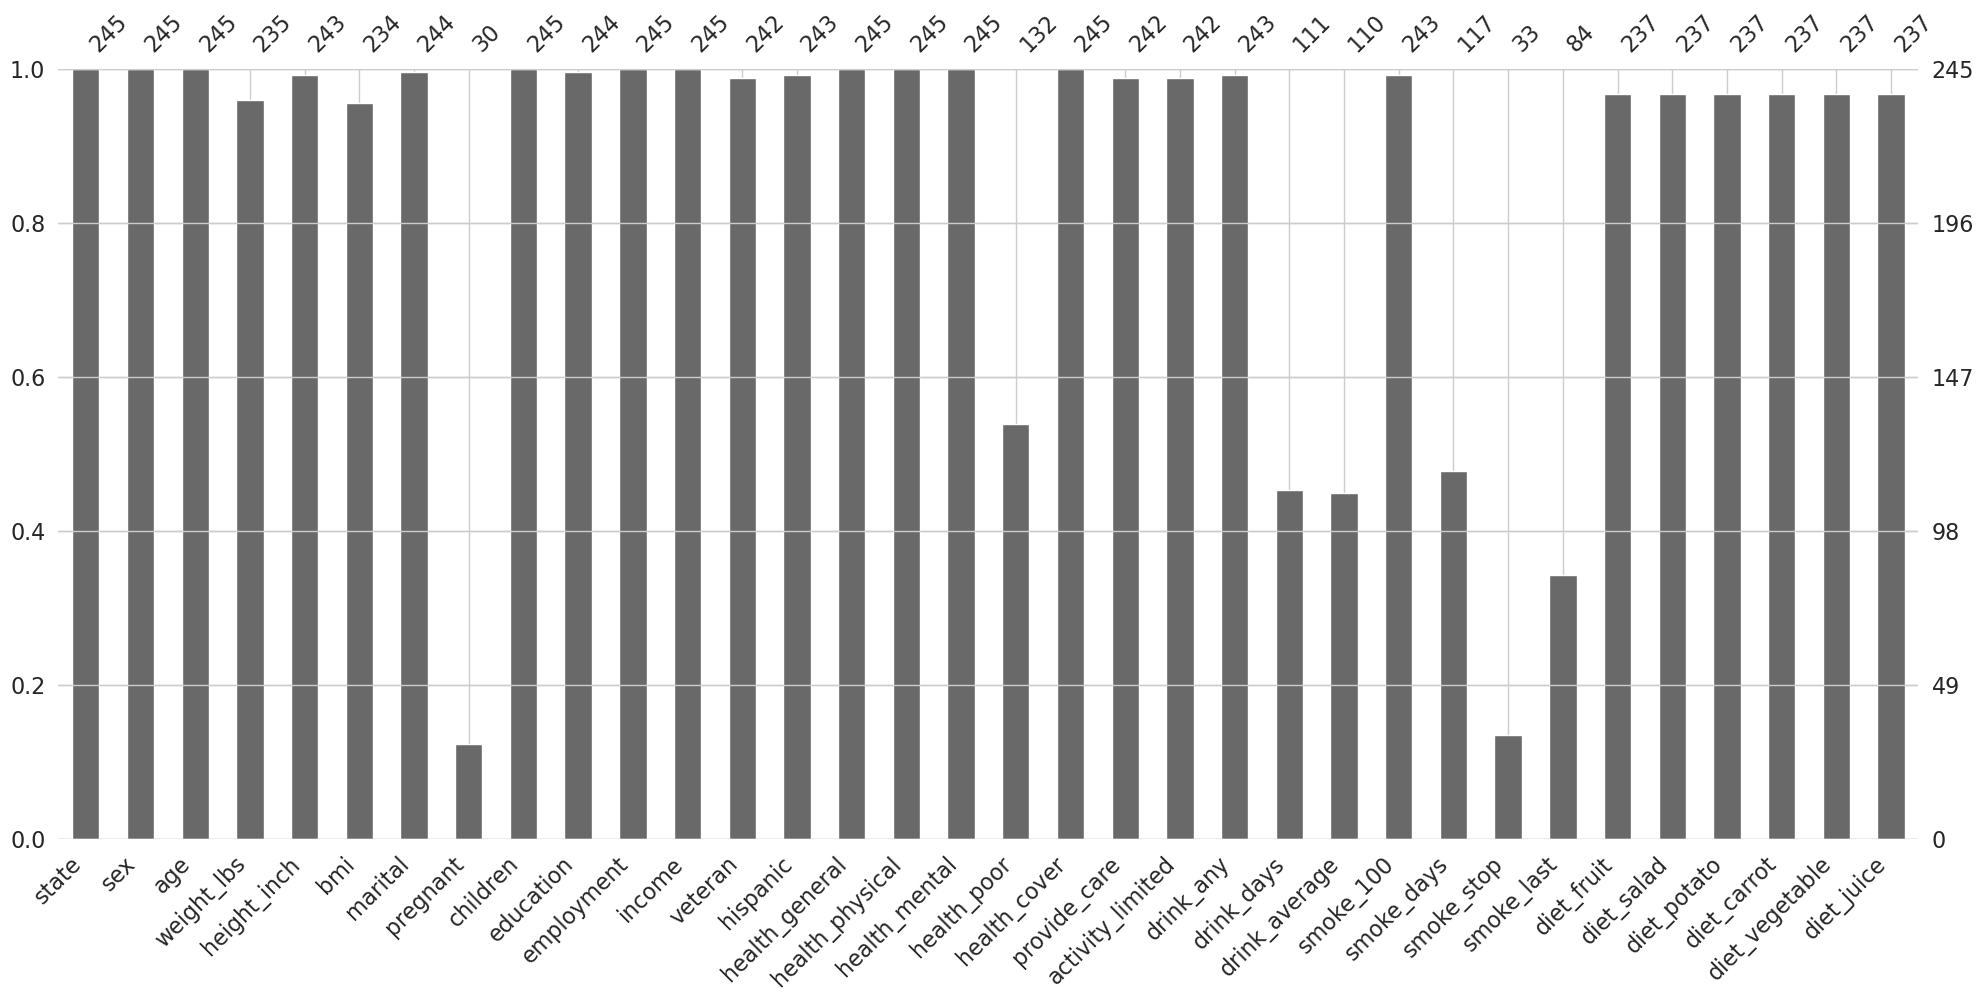

In [85]:
missingno.bar(df = riskfactors_df)
plt.show()

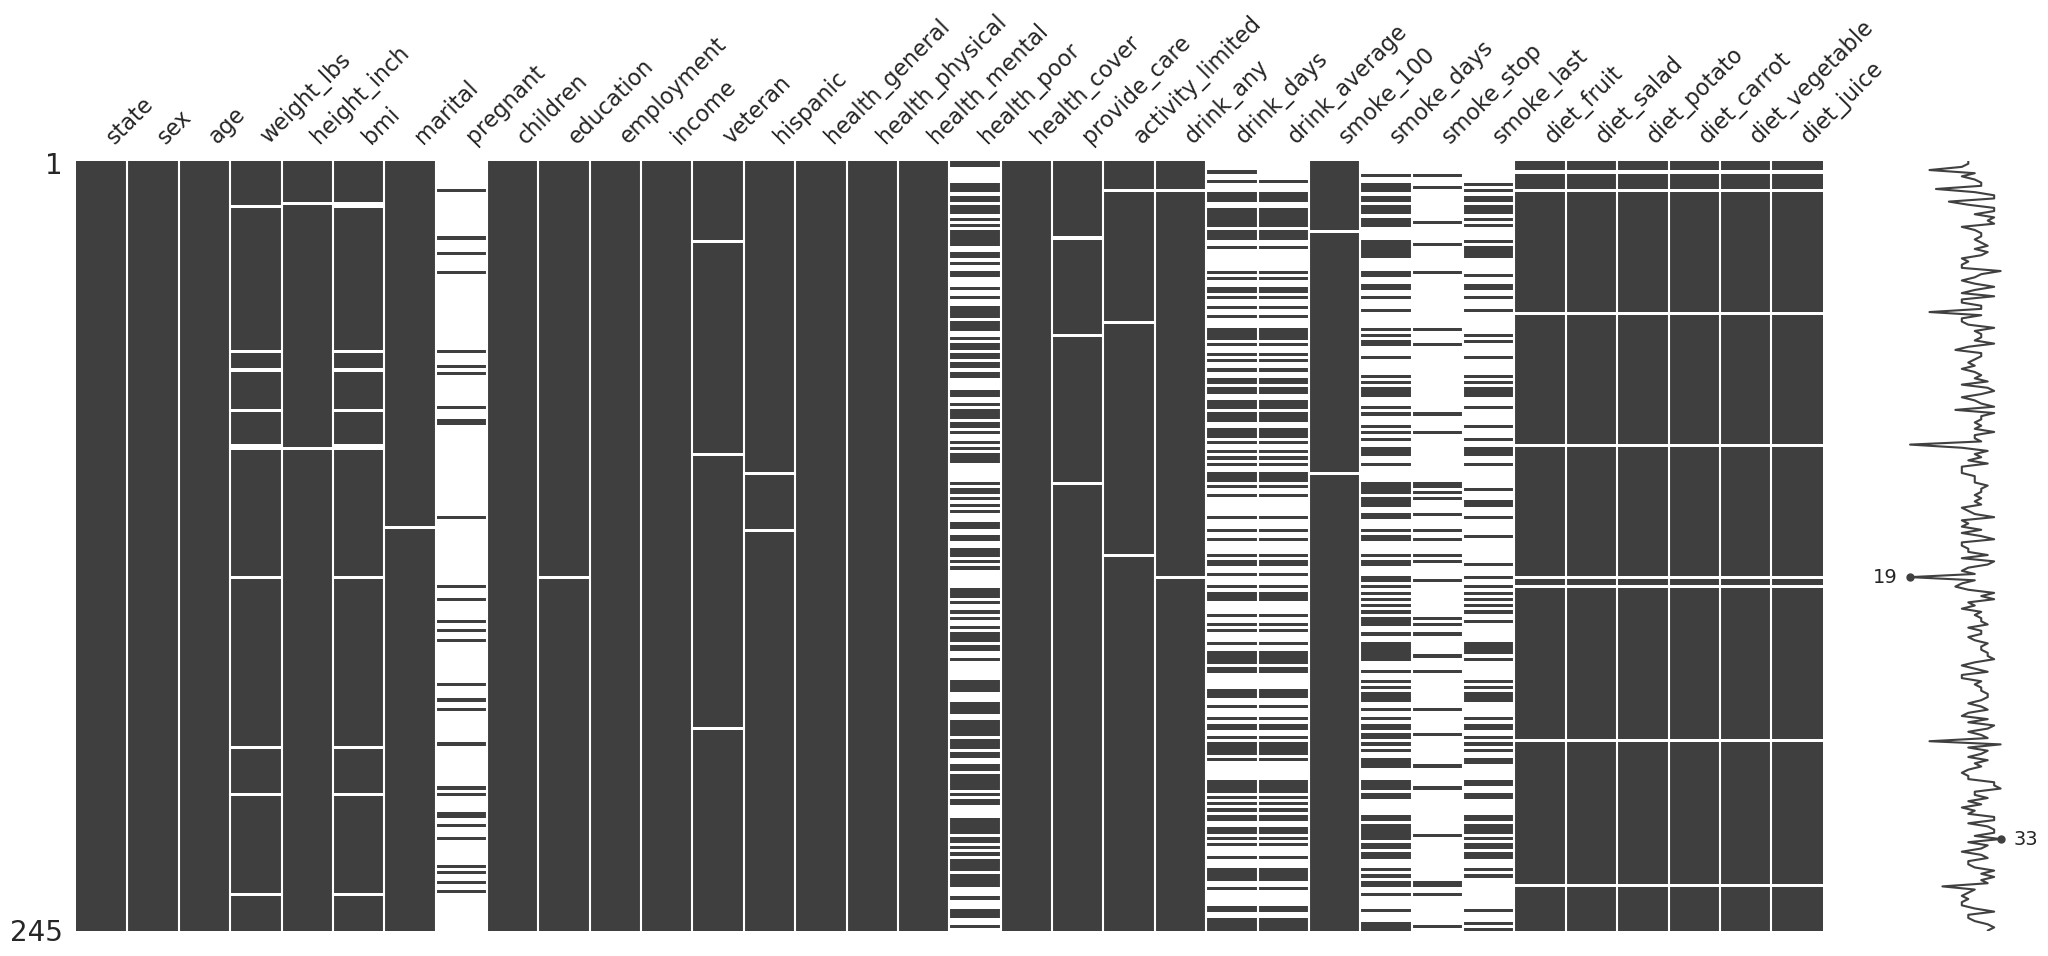

In [86]:
missingno.matrix(df=riskfactors_df)
plt.show()

##### Intersection among missing values:

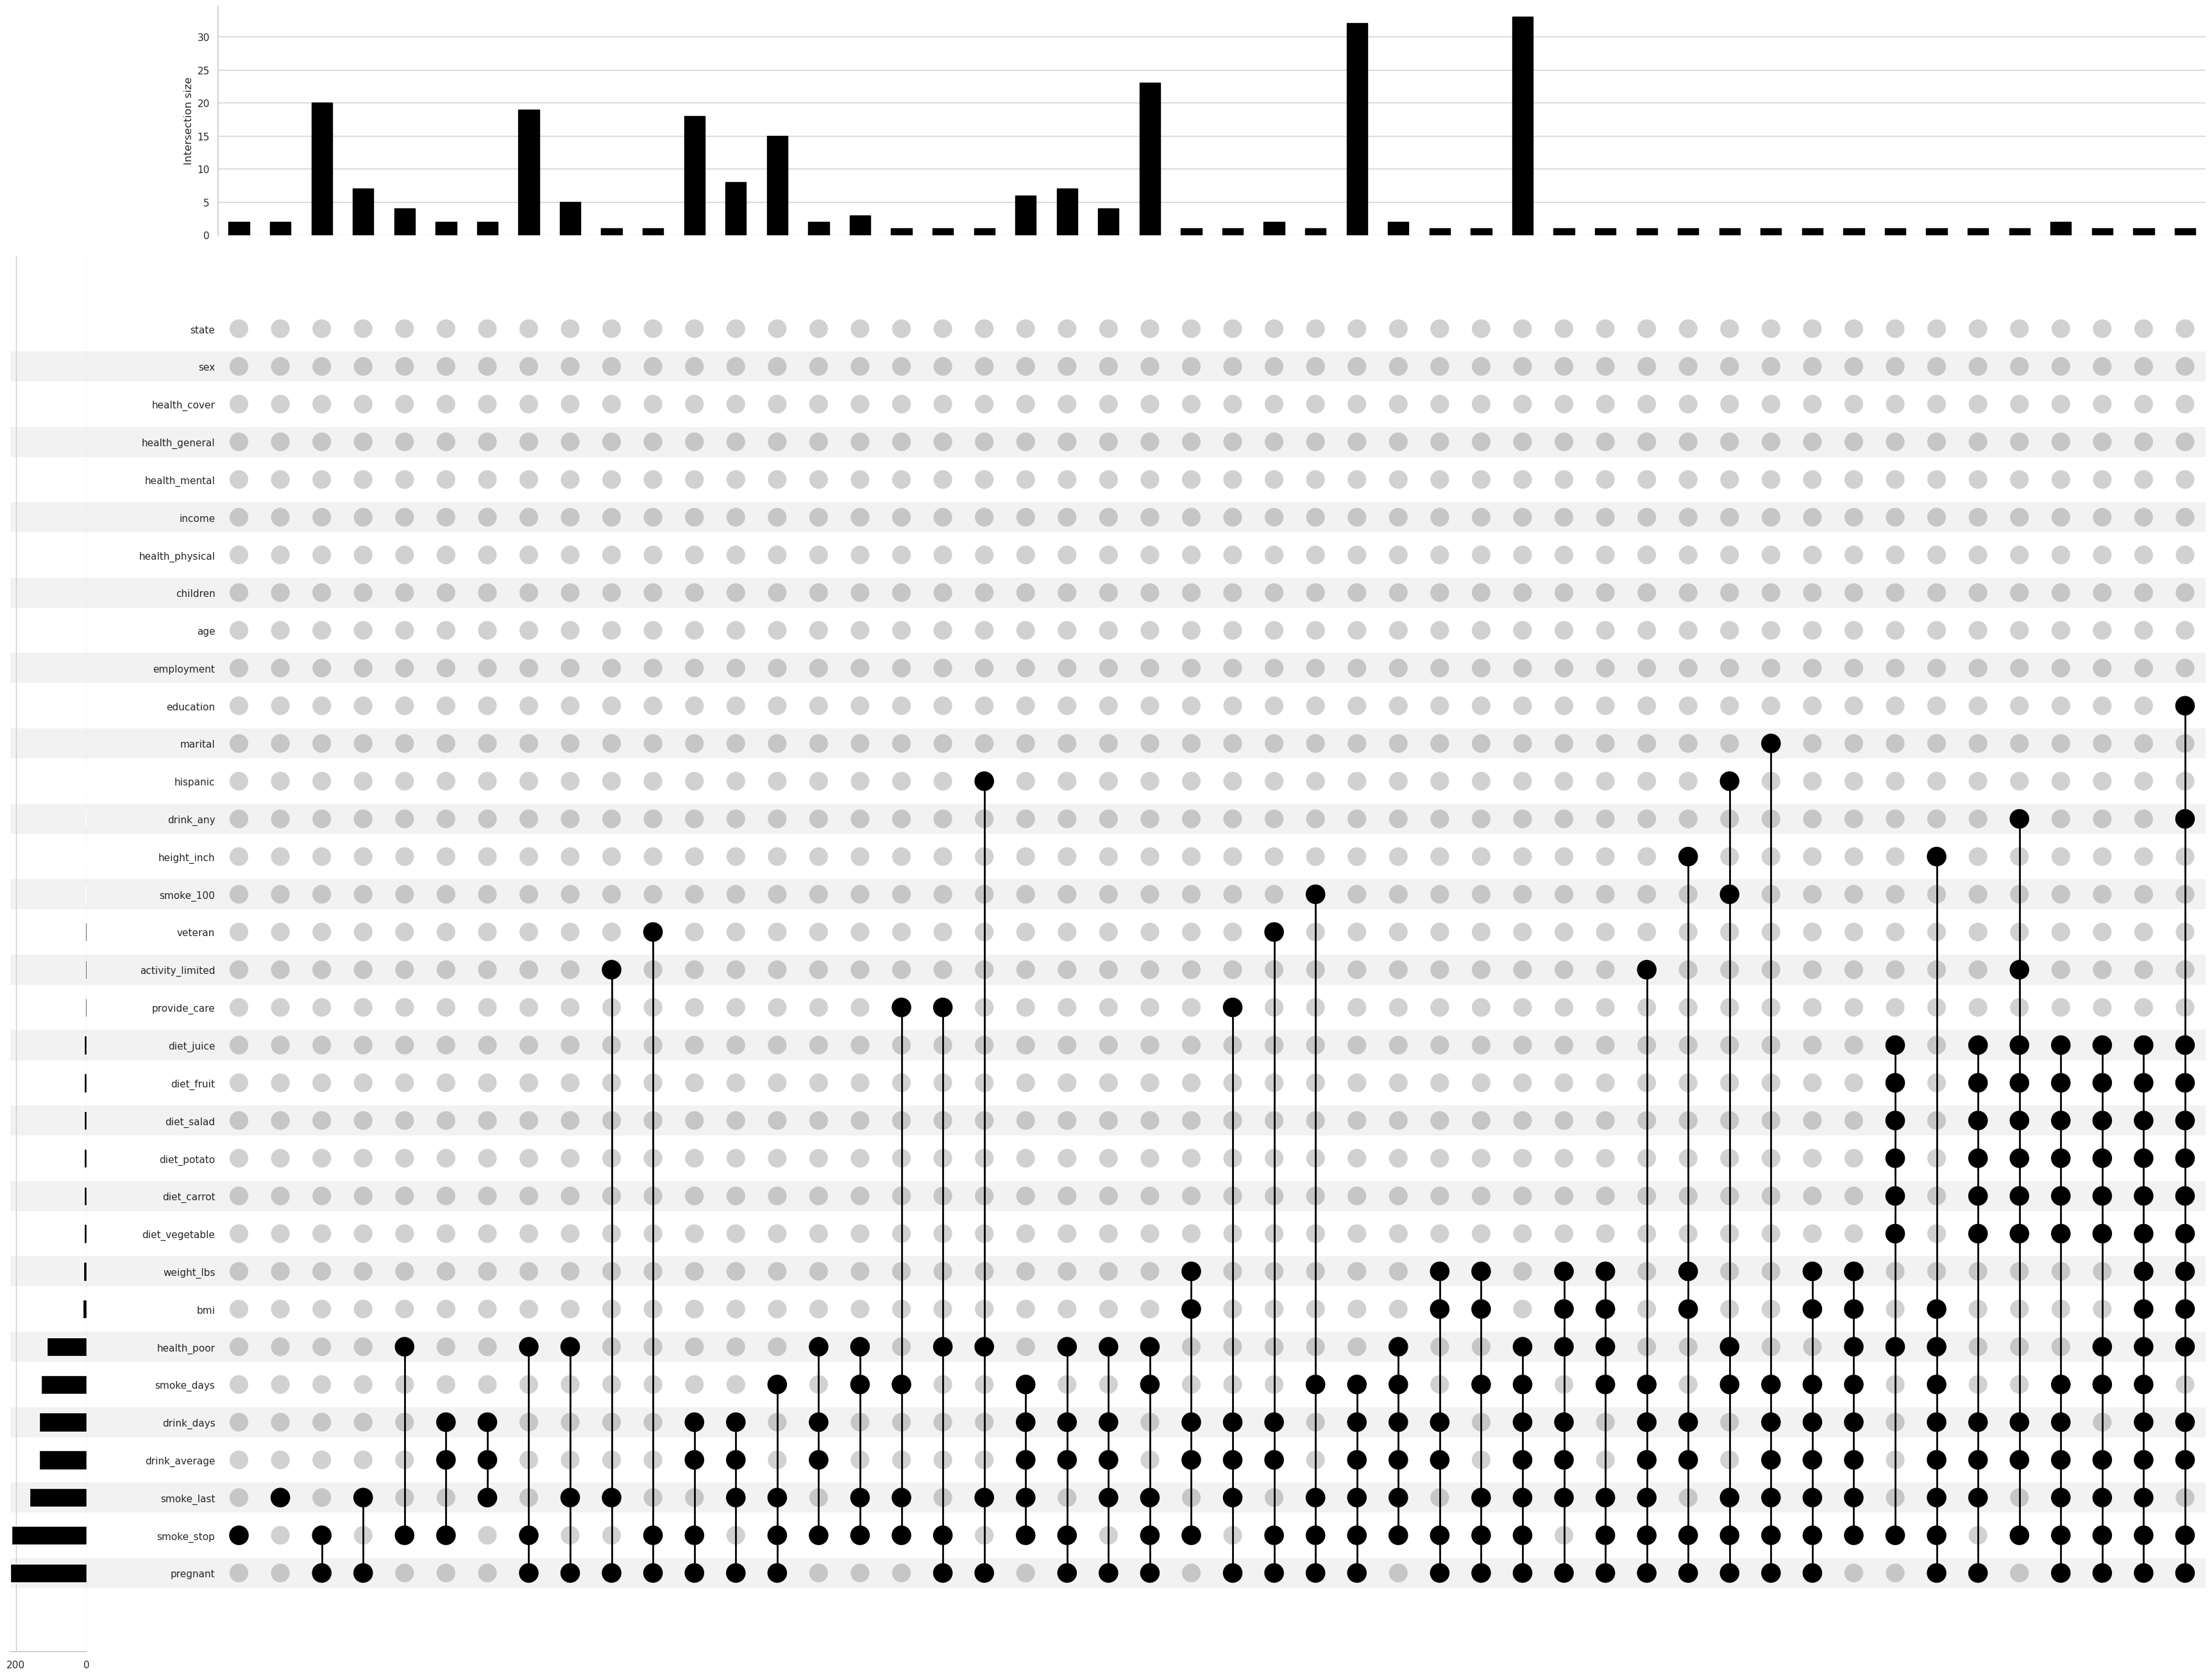

In [87]:
(
    riskfactors_df
    .missing
    .missing_upsetplot(
        variables = None,
        element_size = 60
    )
)
plt.show()

### Encoding missing values

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Warning</b>
    <p>
    Just like every person is a new door to a different world, <b> missing values </b> exist in various forms and colors. When working with missing values, it will be critical to understand their different representations. Even though the working dataset may appear to have no missing values, you should be able to look beyond what is seen with the naked eye to uncover the veil behind which the unknown lies.
    </p>
</div>

### Converting implicit missing values into explicit

In [88]:
implicit_df = pd.DataFrame.from_dict(
    dict(
        name=['lynn', 'lynn', 'lynn', 'zelda'],
        time=['morning', 'afternoon', 'night', 'morning'],
        value=[350, 310, np.nan, 320]
    )
)

implicit_df

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0


#### Strategies to identify implicit values
**Pivot dataset**

In [89]:
(
    implicit_df
    .pivot_wider(
        index='name',
        names_from='time',
        values_from='value'
    )
)

,name,afternoon,morning,night
0,lynn,310.0,350.0,NaN
1,zelda,NaN,320.0,NaN


Quantify n-tuples

In [90]:
(
    implicit_df
    .value_counts(
        subset='name'
    )
    .reset_index(name = "count")
    .query('count < 3')
)

# we need two values for zelda

,name,count
1,zelda,1


### Converting implicit missing rows into explict

<div class="alert alert-info">
    <b style="font-size: 1.5em;">📘 Information</b>
    <p>
        <a href="https://pyjanitor-devs.github.io/pyjanitor/api/functions/#janitor.functions.complete.complete" class="alert-link"><code>janitor.complete()</code></a> is modeled after the <a href="https://tidyr.tidyverse.org/reference/complete.html" class="alert-link"><code>complete()</code></a> function from the <a href="https://tidyr.tidyverse.org/index.html" class="alert-link"><code>tidyr</code></a> package and is a <i>wrapper</i> around <a href="https://pyjanitordevs.github.io/pyjanitor/api/functions/#janitor.functions.expand_grid.expand_grid" class="alert-link"><code>janitor.expand_grid()</code></a>, <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html" class="alert-link"><code>pd.merge()</code></a>, and <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html" class="alert-link"><code>pd.fillna()</code></a>. In a way, it is the opposite of <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html" class="alert-link"><code>pd.dropna()</code></a> as it implicitly exposes the missing rows.
    </p>
    <p>
    Combinations of column names or a list/tuple of column names, or even a dictionary of column names and new values are possible.
    </p>
    <p>
    <a href="https://pandas.pydata.org/docs/user_guide/advanced.html"><code>MultiIndex</code></a> columns are not supported.
    </p>
</div>

In [91]:
(
    implicit_df
    #janitor
    .complete(
        "name",
        "time"
    )
)

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,afternoon,NaN
5,zelda,night,NaN


### Limit exposure of n-tuples of missing values

In [92]:
(
    implicit_df
    .complete(
        {"name": ['zelda', 'lynn']},
        {"time" : ['morning', 'afternoon']},
        sort = True
    )
)
#this is quite useful if you have a bunch of values.

,name,time,value
0,lynn,afternoon,310.0
1,lynn,morning,350.0
2,zelda,afternoon,NaN
3,zelda,morning,320.0
4,lynn,night,NaN


**Complete missing values**

In [93]:
(
    implicit_df
    .complete(
        "name",
        "time",
        fill_value='missing'
    )
)

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,missing
3,zelda,morning,320.0
4,zelda,afternoon,missing
5,zelda,night,missing


**Limit completing of missing values**

In [94]:
(
    implicit_df
    .complete(
        "name",
        "time",
        fill_value='missing',
        explicit=False
    )
)

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,afternoon,missing
5,zelda,night,missing


### Types of missing values

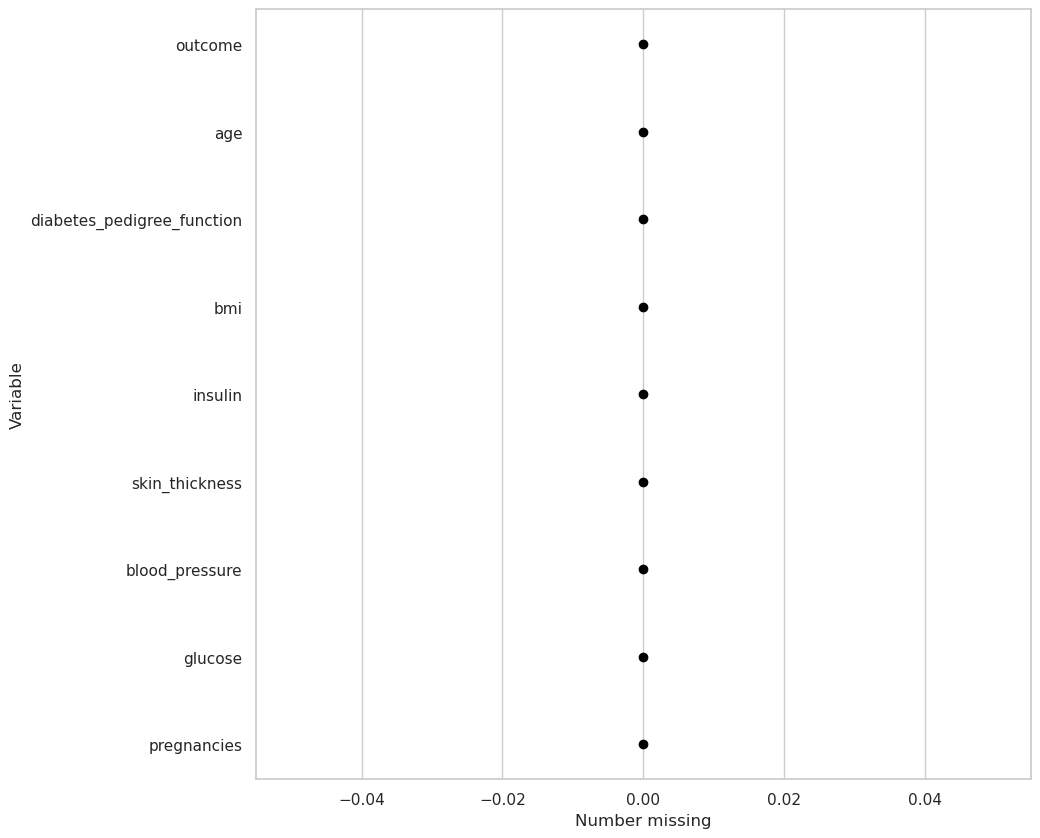

In [95]:
diabetes_df.missing.missing_variable_plot()

Apparently, we don't have any missing values, but it turns out that they're encoded differently.
### _Missing completely at random_ (MCAR)

In [142]:
diabetes_df[diabetes_df.columns[1:6]] = diabetes_df[diabetes_df.columns[1:6]].replace(0, np.nan)

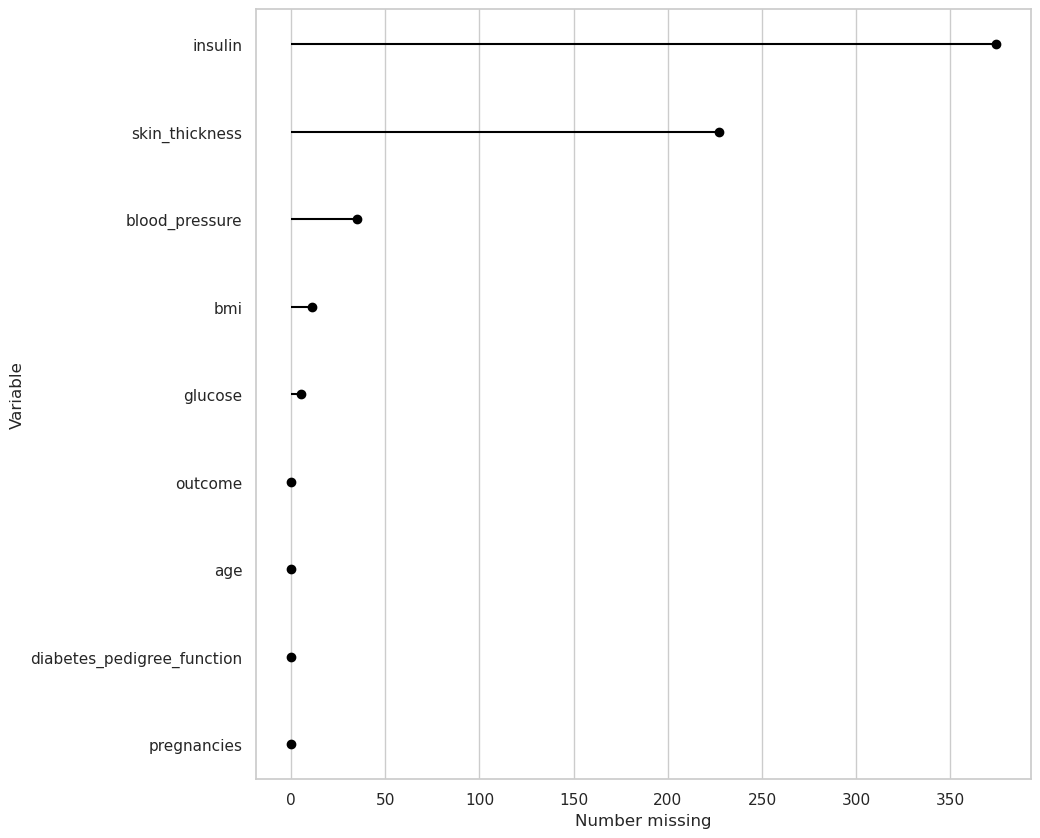

In [143]:
diabetes_df.missing.missing_variable_plot()

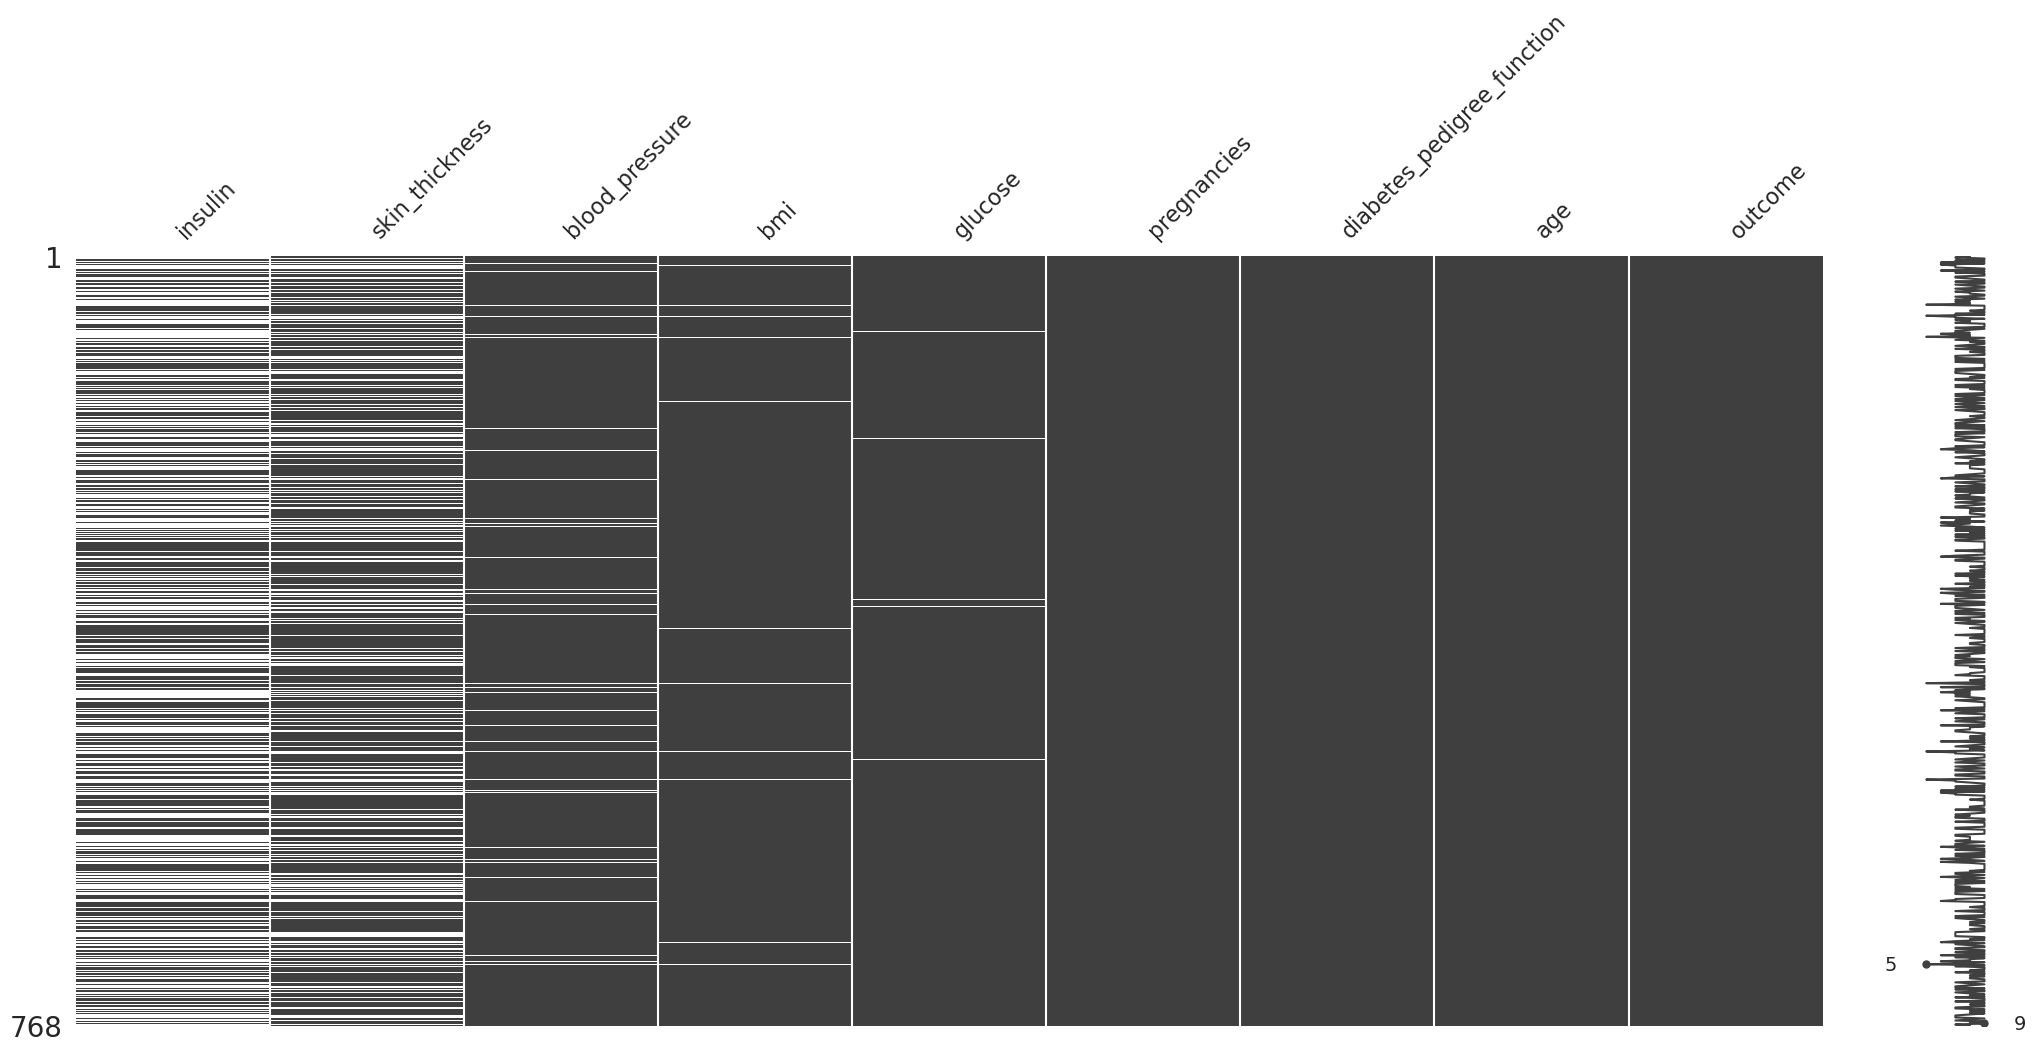

In [144]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix)
)
plt.show()

### _Missing at random_ (MAR)

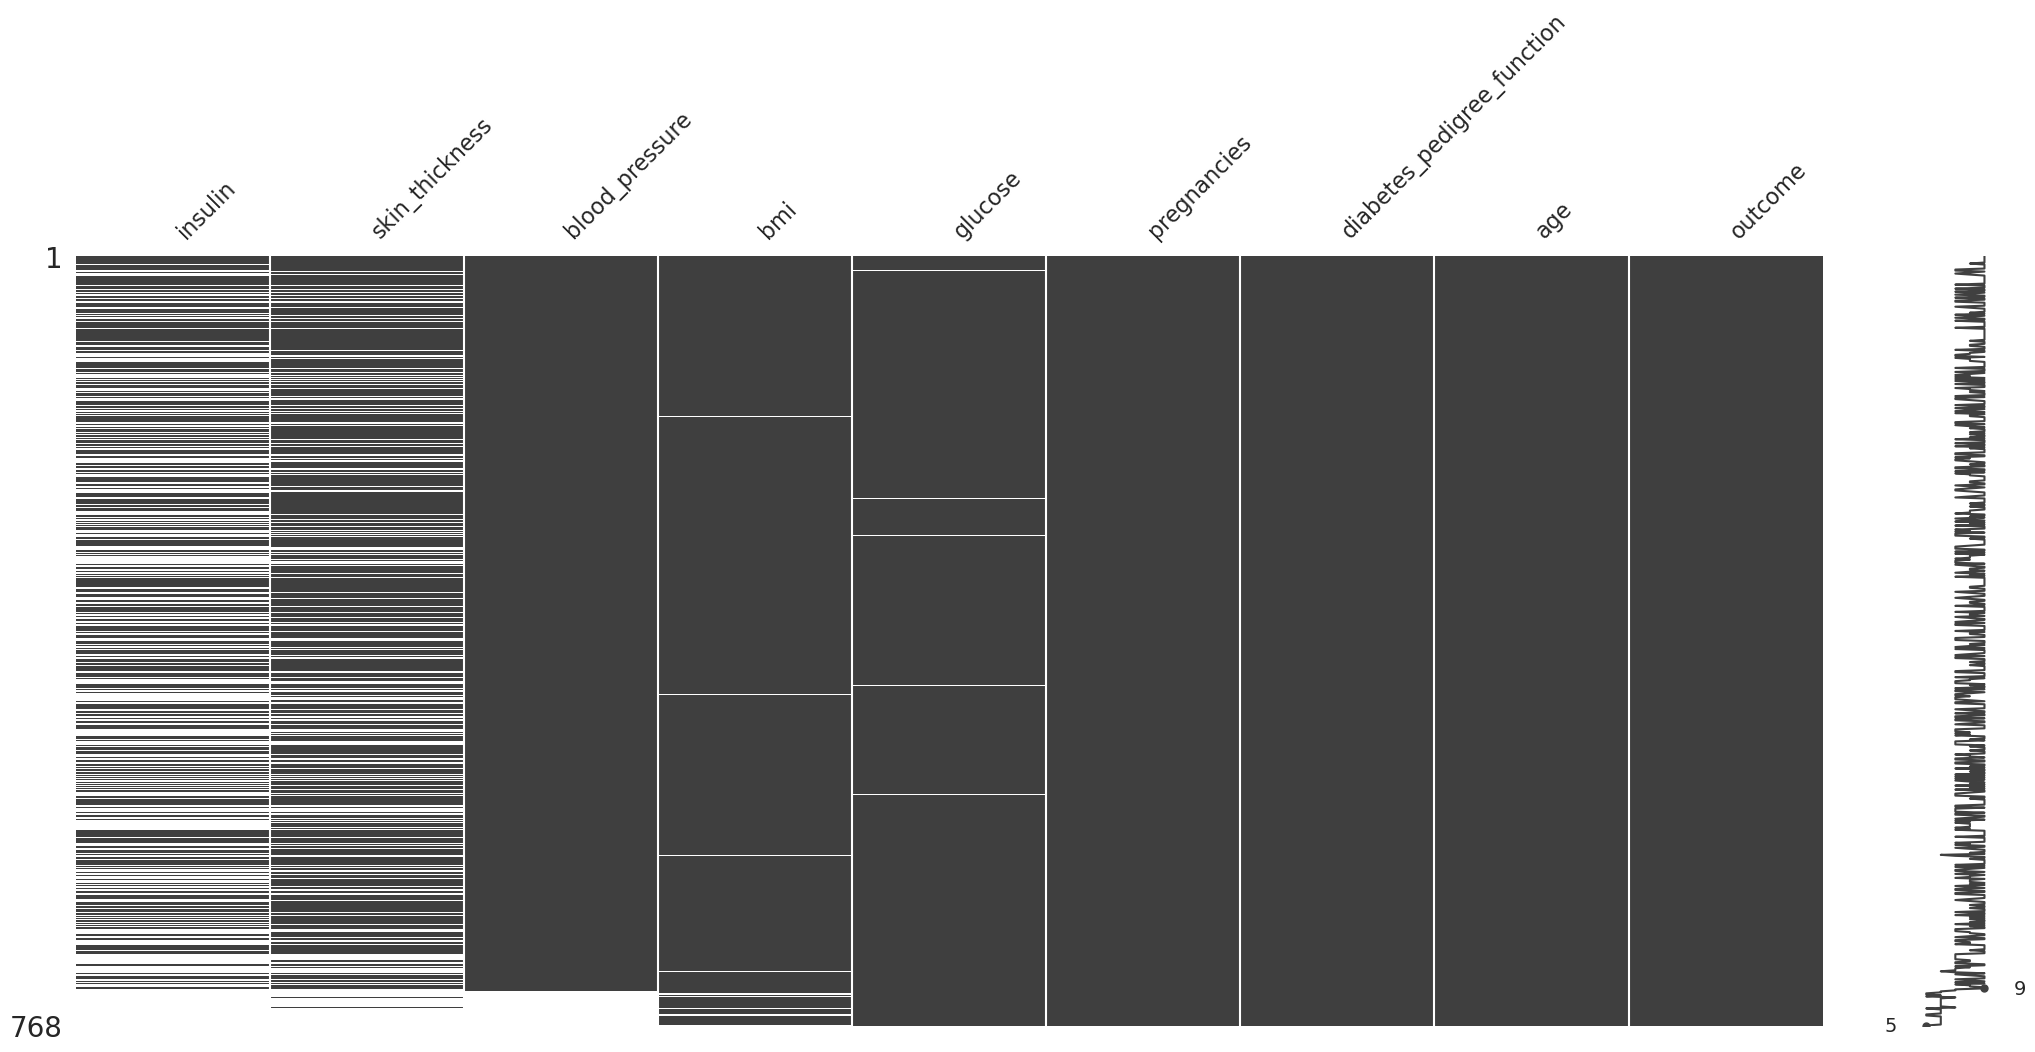

In [145]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values(by="blood_pressure")
    .pipe(missingno.matrix)
)
plt.show()

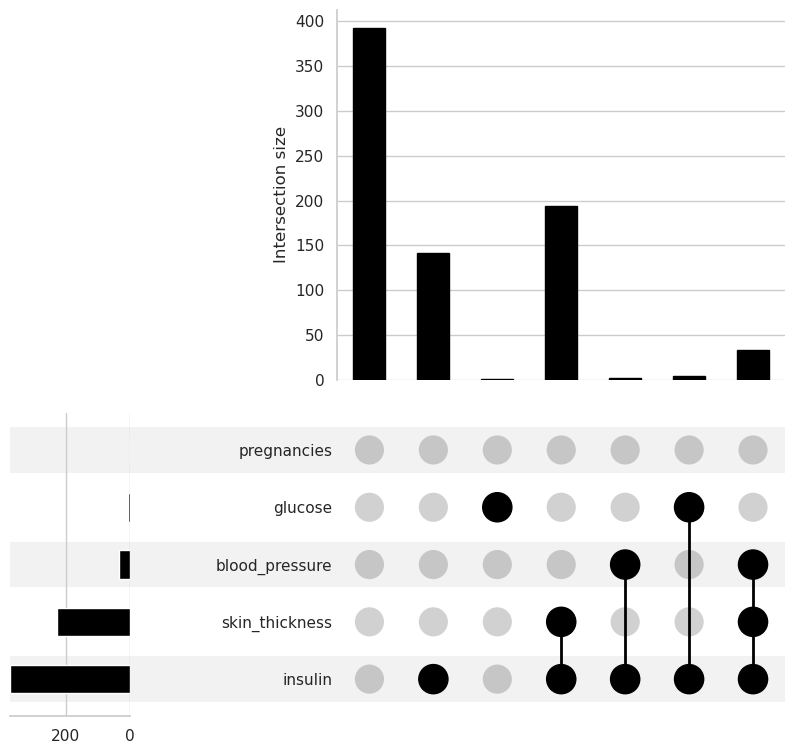

In [146]:
(
    diabetes_df
    .missing
    .missing_upsetplot(
        variables = ["pregnancies", "blood_pressure", "skin_thickness", "insulin", "glucose"],
        element_size = 60
    )
)
plt.show()

### _Missing Not At Random_ (MNAR)

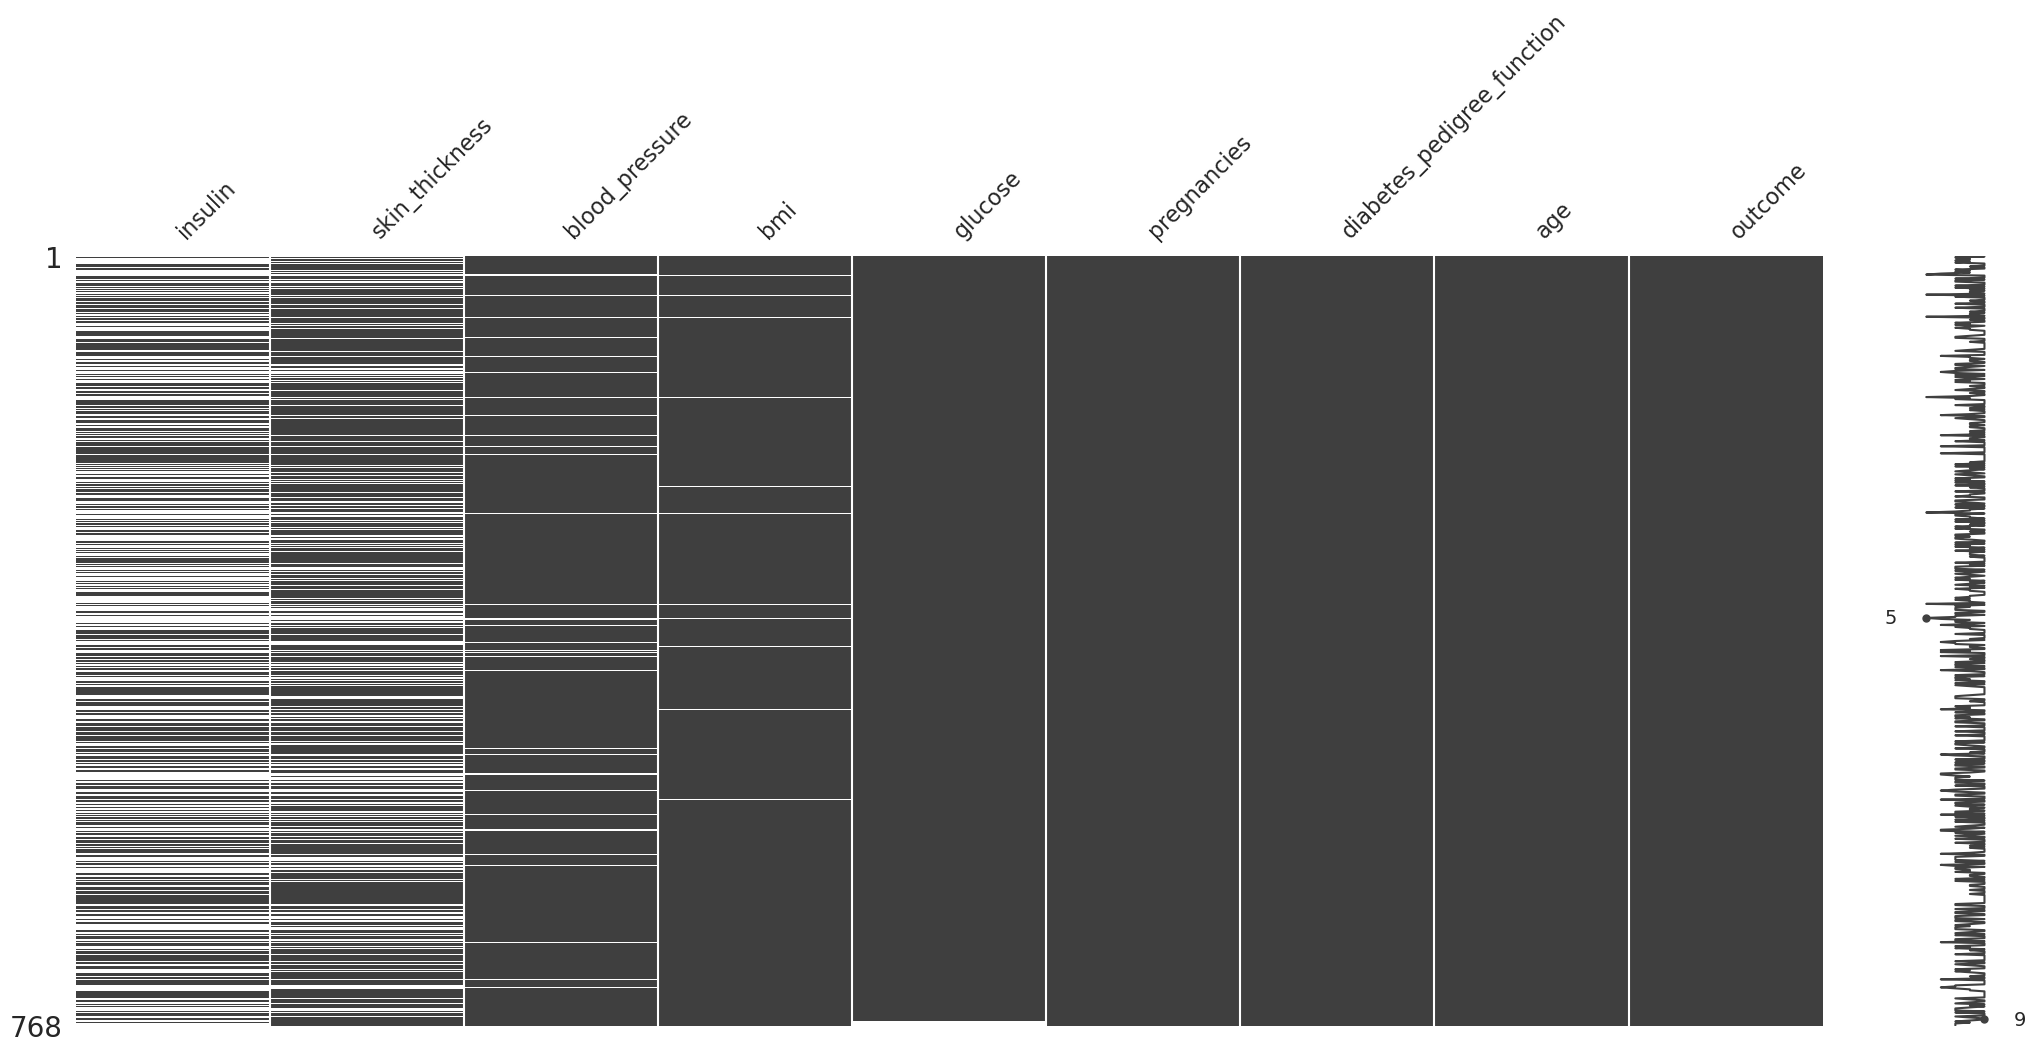

In [147]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values(by="glucose")
    .pipe(missingno.matrix)
)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=12738d77-d13b-4c0a-b945-c500e075c934' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>